# Power profits like traders with option straddles

Traders use options to define the risk of a trade before entering the position. They do this by modeling the payoff and uncovering the breakeven points. The breakeven points are the prices of the underlying where the options start to make or lose money.

Straddles are used to trade volatility of the underlying instrument which is otherwise not possible using “linear” products like stocks and futures.

Traders use straddles when they believe the price of the underlying will move significantly but is unsure in which direction.

The market prices can be combined with the payoff at expiration to design a risk profile.

By understanding this method, we can make more informed decisions about your trading strategies.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from openbb_terminal.sdk import openbb

chains = openbb.stocks.options.chains("AAPL")

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

In [2]:
expirations = chains.expiration.unique()
calls = chains[
    (chains.optionType == "call") 
    & (chains.expiration == expirations[0])
]

puts = chains[
    (chains.optionType == "put") 
    & (chains.expiration == expirations[0])
]

In [3]:
calls_strike = calls.set_index("strike")
puts_strike = puts.set_index("strike")

joined = calls_strike.join(
    puts_strike, 
    how="left", 
    lsuffix="_call", 
    rsuffix="_put"
)

In [4]:
# Finally, get the price of the straddles for each strike price.

prices = joined[["lastPrice_call", "lastPrice_put"]]

prices["straddle_price"] = prices.sum(axis=1)

## Design a risk profile

Computing the price of a straddle at expiration is easy.

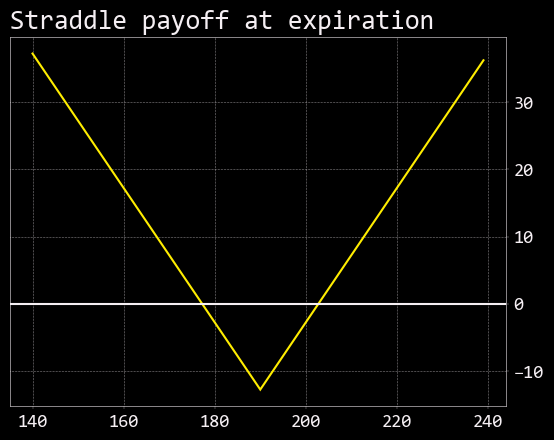

In [5]:
call_payoff = lambda s, k: np.maximum(s - k, 0)
put_payoff = lambda s, k: np.maximum(k - s, 0)

straddle_payoff = lambda s, k: call_payoff(s, k) + put_payoff(s, k)

s = np.arange(140, 240, 1)
k = 190
payoffs = straddle_payoff(s, k) - prices.straddle_price.at[190]

plt.plot(s, payoffs)
plt.title("Straddle payoff at expiration")
plt.axhline(y=0)
plt.show()

The call_payoff function calculates the payoff of a call option. s is the price of the underlying asset, and k is the strike price of the option.

For a call option, if the price of the underlying asset is greater than the strike price, the payoff is the difference between them. Otherwise, the payoff is zero.

It’s the opposite for a put option.

The payoff of a straddle is the sum of the payoffs from the call and the put.

To generate the risk profile plot, create a range of underlying stock prices using NumPy and set the strike price.

Finally, compute the payoffs and plot the risk profile. This line effectively calculates the profit or loss from the straddle strategy at different prices of the underlying asset.

As a trader, you know that if the underlying stock price does not move outside the intersection of the straddle payoff and 0 at expiration—the breakevens—the trade will lose money.